In [ ]:
!pip install torch
!pip install transformers
!pip install tensorflow

In [ ]:
pip install pydub

In [ ]:
pip install ffmpeg-python


In [ ]:
pip install pandas numpy scikit-learn nltk

In [ ]:
pip install librosa

In [ ]:
pip install librosa soundfile numpy tensorflow


In [ ]:
pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from transformers import RobertaTokenizer, TFRobertaModel
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


# Reading the pre-processed Data


In [ ]:
drive_path = "/content/drive/My Drive/CS 297/IEMOCAP"

dataset_path = f"{drive_path}/IEMOCAP_E1.csv"

import pandas as pd
df = pd.read_csv(dataset_path)

In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 2]","[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 1]","[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[3, 1]","[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"


# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

## Evaluator1

Considering first evaluator dimensional and categorical values

In [ ]:
import pandas as pd

e1_df = pd.DataFrame()

e1_df['Arousal'] = df['act'].apply(lambda x: int(x.split(',')[0]))
e1_df['Valence'] = df['val'].apply(lambda x: int(x.split(',')[0]))

e1_df['category'] = df['category'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)
e1_df['category'] = e1_df['category'].apply(lambda x: x[2:-1])


In [ ]:
e1_df

,Arousal,Valence,category
0,2,3,Frustration
1,2,2,Frustration
2,2,3,Fear
3,3,3,Frustration
4,2,2,Fear
...,...,...,...
9922,2,3,Sadness
9923,4,3,Excited
9924,3,3,Sadness
9925,4,4,Excited


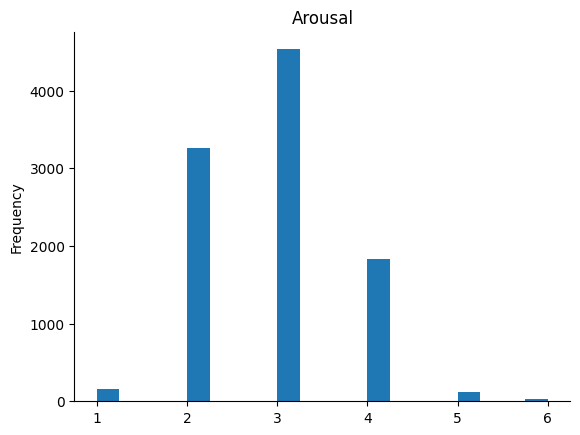

In [ ]:
# @title Arousal
from matplotlib import pyplot as plt
e1_df['Arousal'].plot(kind='hist', bins=20, title='Arousal')
plt.gca().spines[['top', 'right',]].set_visible(False)

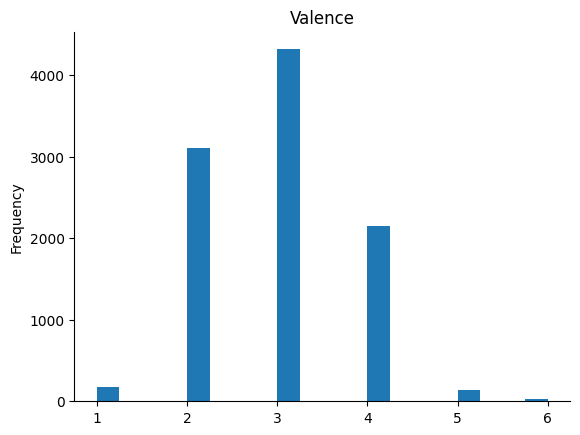

In [ ]:
from matplotlib import pyplot as plt
e1_df['Valence'].plot(kind='hist', bins=20, title='Valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
arousal = e1_df['Arousal']
valence = e1_df['Valence']
major_emotion = e1_df['category']

# DataFrame to store the analytics results
e1_dimensions_df = pd.DataFrame(columns=['Arousal', 'Valence', 'Occurrences', 'Emotions', 'Emotion_Counts'])
grouped_data = e1_df.groupby(['Arousal', 'Valence'])

In [ ]:
for (arousal_point, valence_point), group in grouped_data:

    occurrences = len(group)

    # Aggregate the emotions
    emotions_counts = group['category'].value_counts().to_dict()
    emotions = list(emotions_counts.keys())
    emotion_counts = list(emotions_counts.values())

    # Append the results to the analytics DataFrame
    e1_dimensions_df = e1_dimensions_df.append({
        'Arousal': arousal_point,
        'Valence': valence_point,
        'Occurrences': occurrences,
        'Emotions': emotions,
        'Emotion_Counts': emotion_counts
    }, ignore_index=True)


<ipython-input-12-19a24d5ede14>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e1_dimensions_df = e1_dimensions_df.append({
<ipython-input-12-19a24d5ede14>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e1_dimensions_df = e1_dimensions_df.append({
<ipython-input-12-19a24d5ede14>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e1_dimensions_df = e1_dimensions_df.append({
<ipython-input-12-19a24d5ede14>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e1_dimensions_df = e1_dimensions_df.append({
<ipython-input-12-19a24d5ede14>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
e1_dimensions_df.head()

,Arousal,Valence,Occurrences,Emotions,Emotion_Counts
0,1,1,2,[Sadness],[2]
1,1,2,57,"[Sadness, Frustration, Anger, Neutral, Other, ...","[34, 12, 3, 3, 2, 1, 1, 1]"
2,1,3,89,"[Frustration, Sadness, Excited, Neutral, Happi...","[33, 32, 9, 6, 5, 3, 1]"
3,1,4,10,"[Excited, Frustration, Sadness, Neutral]","[6, 2, 1, 1]"
4,2,1,7,"[Sadness, Anger, Frustration]","[4, 2, 1]"


## Evaluator

Considering 2nd evaluator dimensional and categorical values

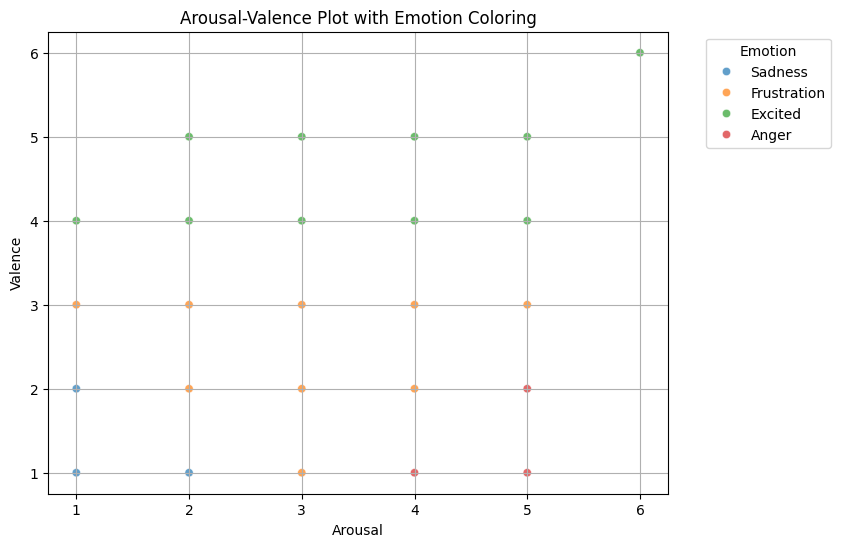

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract data from final_df
arousal_values = e1_dimensions_df['Arousal']
valence_values = e1_dimensions_df['Valence']
emotions = e1_dimensions_df['Emotions']

# Unique emotions and their counts
unique_emotions, emotion_counts = [], []
for emo in emotions:
    unique_emotions.append(emo[0])  # First emotion from the list
    emotion_counts.append(len(emo))

# Arousal and Valence values in a 2D plane
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=arousal_values, y=valence_values, hue=unique_emotions, palette='tab10', alpha=0.7)
plt.title('Arousal-Valence Plot with Emotion Coloring')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.grid(True)
plt.show()


In [ ]:
e2_df = pd.DataFrame()

e2_df['Arousal'] = df['act'].apply(lambda x: int(x.split(',')[1]))
e2_df['Valence'] = df['val'].apply(lambda x: int(x.split(',')[1]))

e2_df['category'] = df['category'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) else None)
e2_df['category'] = e2_df['category'].apply(lambda x: x[1:-1])


In [ ]:
e2_df

,Arousal,Valence,category
0,4,3,Fear
1,5,2,Fear
2,4,3,Fear
3,5,2,Fear
4,4,3,Fear
...,...,...,...
9922,3,3,Neutral
9923,4,3,Sadness
9924,4,2,Sadness
9925,5,4,Happiness


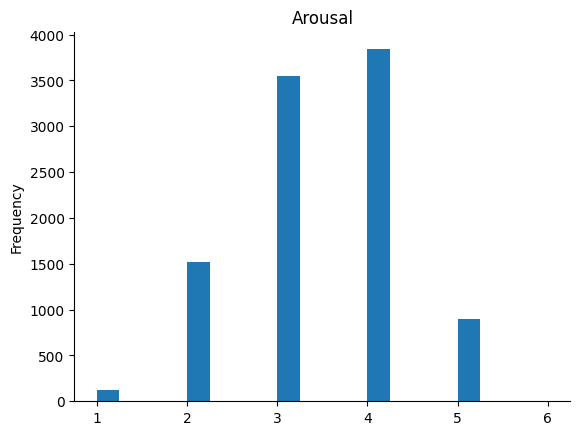

In [ ]:
from matplotlib import pyplot as plt
e2_df['Arousal'].plot(kind='hist', bins=20, title='Arousal')
plt.gca().spines[['top', 'right',]].set_visible(False)

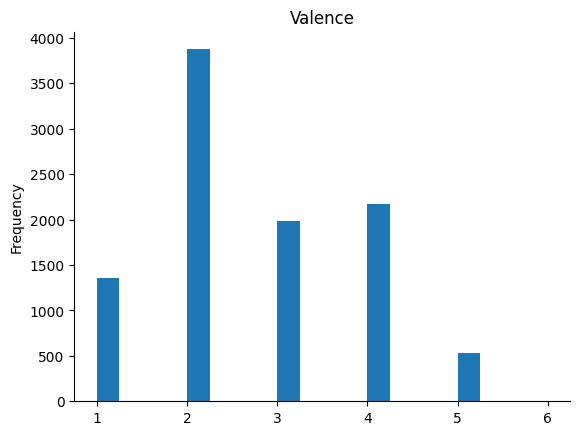

In [ ]:
from matplotlib import pyplot as plt
e2_df['Valence'].plot(kind='hist', bins=20, title='Valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
arousal = e2_df['Arousal']
valence = e2_df['Valence']
major_emotion = e2_df['category']

# DataFrame to store the analytics results
e2_dimensions_df = pd.DataFrame(columns=['Arousal', 'Valence', 'Occurrences', 'Emotions', 'Emotion_Counts'])
grouped_data = e2_df.groupby(['Arousal', 'Valence'])

In [ ]:
for (arousal_point, valence_point), group in grouped_data:
    occurrences = len(group)
    emotions_counts = group['category'].value_counts().to_dict()
    emotions = list(emotions_counts.keys())
    emotion_counts = list(emotions_counts.values())
    e2_dimensions_df = e2_dimensions_df.append({
        'Arousal': arousal_point,
        'Valence': valence_point,
        'Occurrences': occurrences,
        'Emotions': emotions,
        'Emotion_Counts': emotion_counts
    }, ignore_index=True)


<ipython-input-19-58098fcf1f41>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e2_dimensions_df = e2_dimensions_df.append({
<ipython-input-19-58098fcf1f41>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e2_dimensions_df = e2_dimensions_df.append({
<ipython-input-19-58098fcf1f41>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e2_dimensions_df = e2_dimensions_df.append({
<ipython-input-19-58098fcf1f41>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e2_dimensions_df = e2_dimensions_df.append({
<ipython-input-19-58098fcf1f41>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
e2_dimensions_df

,Arousal,Valence,Occurrences,Emotions,Emotion_Counts
0,1,1,22,"[Sadness, Neutral, Anger, Happiness]","[18, 2, 1, 1]"
1,1,2,62,"[Sadness, Neutral, Frustration, Surprise, Othe...","[45, 10, 2, 2, 2, 1]"
2,1,3,37,"[Neutral, Sadness, Frustration, Anger]","[17, 13, 5, 2]"
3,1,4,1,[Happiness],[1]
4,2,1,159,"[Sadness, Anger, Frustration, Neutral, Other, ...","[118, 18, 12, 5, 3, 1, 1, 1]"
5,2,2,679,"[Sadness, Neutral, Frustration, Anger, Happine...","[349, 123, 82, 71, 19, 15, 12, 3, 3, 2]"
6,2,3,436,"[Neutral, Sadness, Frustration, Anger, Happine...","[227, 90, 56, 26, 22, 8, 3, 2, 1, 1]"
7,2,4,240,"[Happiness, Neutral, Sadness, Excited, Frustra...","[109, 80, 21, 16, 6, 5, 2, 1]"
8,2,5,5,"[Happiness, Excited]","[4, 1]"
9,3,1,254,"[Anger, Sadness, Frustration, Surprise, Neutra...","[98, 90, 38, 10, 8, 4, 3, 2, 1]"


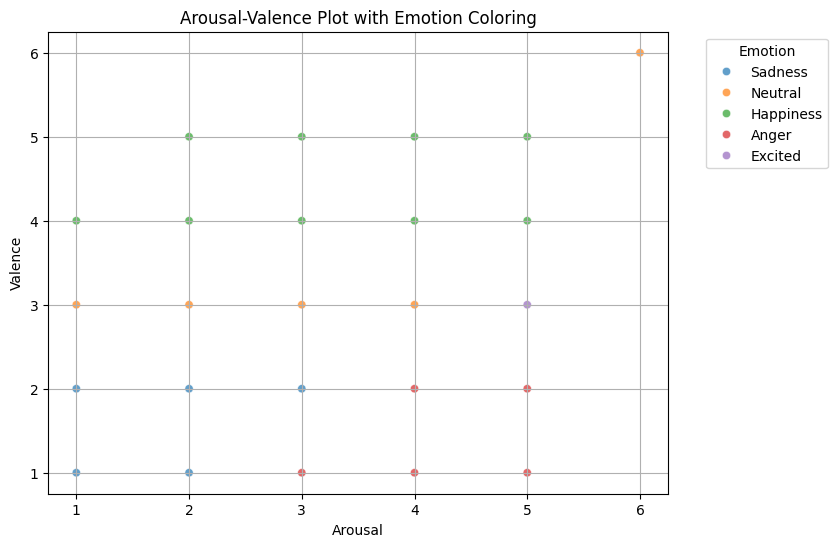

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


arousal_values = e2_dimensions_df['Arousal']
valence_values = e2_dimensions_df['Valence']
emotions = e2_dimensions_df['Emotions']


unique_emotions, emotion_counts = [], []
for emo in emotions:
    unique_emotions.append(emo[0])
    emotion_counts.append(len(emo))


plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=arousal_values, y=valence_values, hue=unique_emotions, palette='tab10', alpha=0.7)
plt.title('Arousal-Valence Plot with Emotion Coloring')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.grid(True)
plt.show()


In [ ]:
grouped_data = e1_df.groupby(['Arousal', 'Valence'])

arousal_valence_points = []
occurrences = []
emotions = []
emotion_counts = []


for (arousal, valence), group in grouped_data:
    occurrence_count = len(group)
    all_emotions = [emotion for sublist in [ast.literal_eval(e) for e in group['category'].tolist()] for emotion in sublist]
    emotion_count = pd.Series(all_emotions).value_counts().to_dict()

    sorted_emotions = sorted(emotion_count.items(), key=lambda x: x[1], reverse=True)

    arousal_valence_points.append((arousal, valence))
    occurrences.append(occurrence_count)
    emotions.append([emotion[0] for emotion in sorted_emotions])
    emotion_counts.append([emotion[1] for emotion in sorted_emotions])

e1_dimensions_df = pd.DataFrame({
    'Arousal': [point[0] for point in arousal_valence_points],
    'Valence': [point[1] for point in arousal_valence_points],
    'Occurrences': occurrences,
    'Emotions': emotions,
    'Emotion_Counts': emotion_counts
})


In [ ]:
arousal = dimension_df['Arousal']
valence = dimension_df['Valence']
major_emotion = dimension_df['major']

analytics_df = pd.DataFrame(columns=['Arousal', 'Valence', 'Occurrences', 'Emotions', 'Emotion_Counts'])
grouped_data = dimension_df.groupby(['Arousal', 'Valence'])

In [ ]:
analytics_df

,Arousal,Valence,Occurrences,Emotions,Emotion_Counts
0,1,1,2,[Sadness],[2]
1,1,2,57,"[Sadness, Neutral state, Frustration, Surprise...","[33, 11, 9, 2, 1, 1]"
2,1,3,89,"[Neutral state, Sadness, Frustration, Anger, H...","[34, 29, 16, 4, 3, 2, 1]"
3,1,4,10,"[Neutral state, Sadness, Frustration, Excited]","[7, 1, 1, 1]"
4,2,1,7,"[Sadness, Anger, Frustration]","[4, 2, 1]"
5,2,2,761,"[Sadness, Frustration, Anger, Neutral state, O...","[249, 226, 118, 90, 27, 24, 11, 10, 6]"
6,2,3,1881,"[Neutral state, Frustration, Sadness, Anger, H...","[766, 375, 302, 127, 104, 103, 52, 33, 14, 5]"
7,2,4,605,"[Happiness, Neutral state, Excited, Frustratio...","[203, 181, 138, 29, 24, 12, 10, 8]"
8,2,5,10,"[Happiness, Excited, Surprise, Neutral state]","[5, 3, 1, 1]"
9,3,1,32,"[Anger, Sadness, Frustration, Surprise]","[11, 11, 9, 1]"


In [ ]:
avg_df = pd.DataFrame()

avg_df['Arousal'] = df['dimension'].apply(lambda x: float(x.split(',')[0].split(':')[1].strip()))
avg_df['Valence'] = df['dimension'].apply(lambda x: float(x.split(',')[1].split(':')[1].strip()))

avg_df['emotion'] = df['category']

In [ ]:
avg_df

,Arousal,Valence,emotion
0,3.0,3.0,"['Frustration', 'Fear', 'Excited']"
1,3.5,2.0,"['Frustration', 'Fear', 'Excited']"
2,3.0,3.0,"['Fear', 'Fear', 'Excited']"
3,4.0,2.5,"['Frustration', 'Fear', 'Excited']"
4,3.0,2.5,"['Fear', 'Fear', 'Excited']"
...,...,...,...
10032,2.5,3.0,"['Sadness', 'Neutral', 'Neutral']"
10033,4.0,3.0,"['Excited', 'Sadness', 'Excited']"
10034,3.5,2.5,"['Sadness', 'Sadness', 'Other']"
10035,4.5,4.0,"['Excited', 'Happiness', 'Happiness']"


In [ ]:
arousal = avg_df['Arousal']
valence = avg_df['Valence']
major_emotion = avg_df['emotion']
analytics_df = pd.DataFrame(columns=['Arousal', 'Valence', 'Occurrences', 'Emotions', 'Emotion_Counts'])


In [ ]:
grouped_data = avg_df.groupby(['Arousal', 'Valence'])

In [ ]:
arousal_valence_points = []
occurrences = []
emotions = []
emotion_counts = []

for (arousal, valence), group in grouped_data:
    occurrence_count = len(group)
    all_emotions = [emotion for sublist in group['emotion'] for emotion in sublist]
    emotion_count = pd.Series(all_emotions).value_counts().to_dict()
    arousal_valence_points.append((arousal, valence))
    occurrences.append(occurrence_count)
    emotions.append(list(emotion_count.keys()))
    emotion_counts.append(list(emotion_count.values()))
analytics_df = pd.DataFrame({
    'Arousal_Valence_Point': arousal_valence_points,
    'Occurrences': occurrences,
    'Emotions': emotions,
    'Emotion_Counts': emotion_counts
})


In [ ]:
grouped_data = avg_df.groupby(['Arousal', 'Valence'])

arousal_valence_points = []
occurrences = []
emotions = []
emotion_counts = []

for (arousal, valence), group in grouped_data:
    occurrence_count = len(group)
    all_emotions = [emotion for sublist in [ast.literal_eval(e) for e in group['emotion'].tolist()] for emotion in sublist]
    emotion_count = pd.Series(all_emotions).value_counts().to_dict()
    sorted_emotions = sorted(emotion_count.items(), key=lambda x: x[1], reverse=True)
    arousal_valence_points.append((arousal, valence))
    occurrences.append(occurrence_count)
    emotions.append([emotion[0] for emotion in sorted_emotions])
    emotion_counts.append([emotion[1] for emotion in sorted_emotions])
final_df = pd.DataFrame({
    'Arousal': [point[0] for point in arousal_valence_points],
    'Valence': [point[1] for point in arousal_valence_points],
    'Occurrences': occurrences,
    'Emotions': emotions,
    'Emotion_Counts': emotion_counts
})


In [ ]:
final_df.head(12)

,Arousal,Valence,Occurrences,Emotions,Emotion_Counts
0,1.0000,1.5000,1,"[Sadness, Frustration]","[2, 1]"
1,1.0000,2.0000,5,"[Sadness, Neutral]","[9, 7]"
2,1.0000,2.5000,3,"[Frustration, Sadness, Neutral]","[4, 3, 3]"
3,1.3333,1.3333,1,[Sadness],[4]
4,1.3333,2.0000,2,"[Sadness, Frustration]","[6, 1]"
5,1.3333,2.3333,3,"[Sadness, Frustration, Neutral, Other]","[4, 2, 2, 1]"
6,1.3333,2.6667,1,"[Neutral, Happiness]","[2, 1]"
7,1.3333,3.0000,2,"[Neutral, Frustration, Happiness]","[4, 1, 1]"
8,1.5000,1.5000,18,"[Sadness, Frustration, Other, Fear, Anger, Neu...","[35, 9, 4, 4, 3, 3, 1, 1]"
9,1.5000,2.0000,41,"[Sadness, Neutral, Frustration, Anger, Other, ...","[77, 23, 19, 7, 5, 1]"


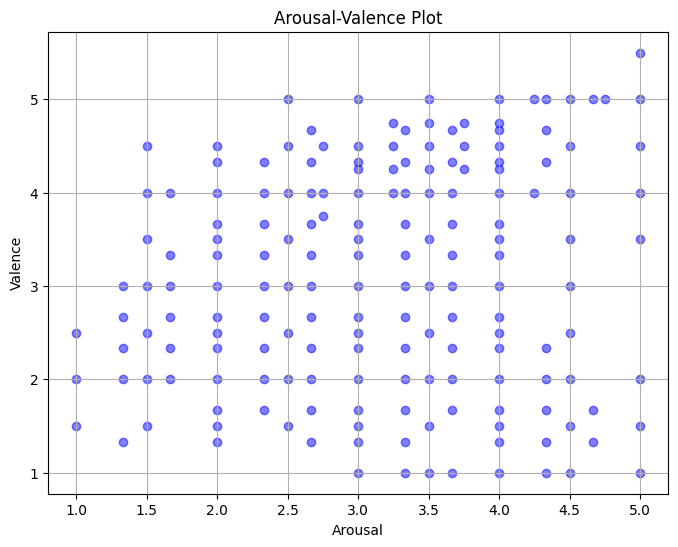

In [ ]:
import matplotlib.pyplot as plt

arousal_values = final_df['Arousal']
valence_values = final_df['Valence']

plt.figure(figsize=(8, 6))
plt.scatter(arousal_values, valence_values, color='blue', alpha=0.5)
plt.title('Arousal-Valence Plot')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.grid(True)
plt.show()


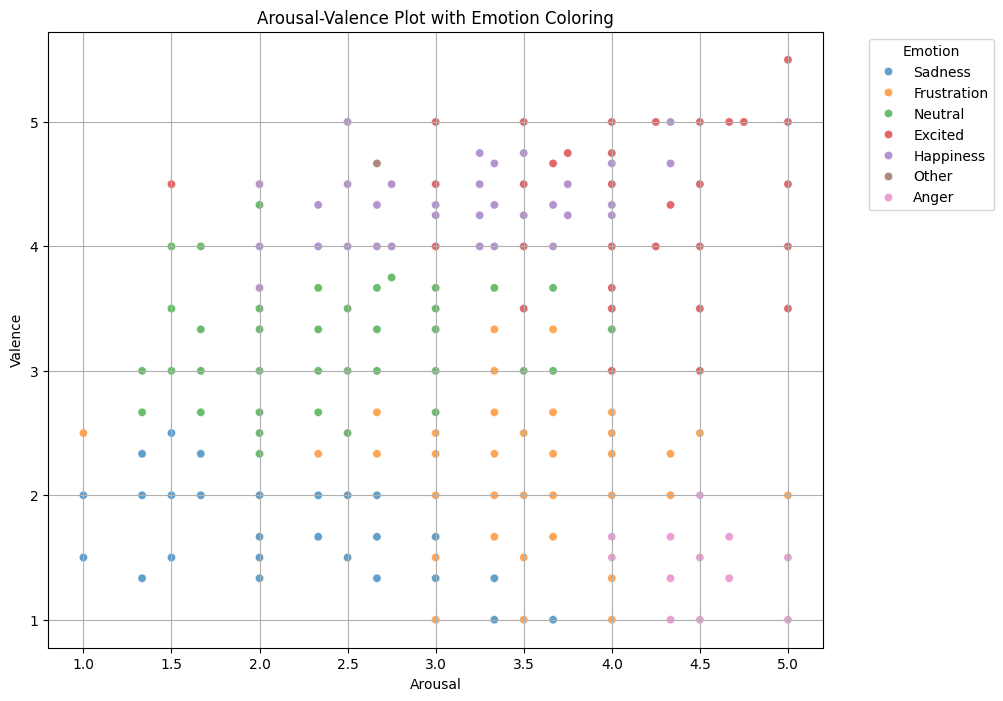

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

arousal_values = final_df['Arousal']
valence_values = final_df['Valence']
emotions = final_df['Emotions']

unique_emotions, emotion_counts = [], []
for emo in emotions:
    emotion_counts.append(len(emo))

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=arousal_values, y=valence_values, hue=unique_emotions, palette='tab10', alpha=0.7)
plt.title('Arousal-Valence Plot with Emotion Coloring')
plt.xlabel('Arousal')
plt.ylabel('Valence')

plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.grid(True)
plt.show()


In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.0,3.0,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.5,2.0,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,3.0,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,4.0,2.5,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,2.5,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"


In [ ]:
df['Arousal'] = df['dimension'].apply(lambda x: float(x.split(',')[0].split(':')[1].strip()))
df['Valence'] = df['dimension'].apply(lambda x: float(x.split(',')[1].split(':')[1].strip()))


In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.0,3.0,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.5,2.0,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,3.0,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,4.0,2.5,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,2.5,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"


In [ ]:
df_sample = df.head(800).copy()

# Feature Extraction

In [ ]:
import librosa

def load_audio_file(file_path):
    data, sample_rate = librosa.load(file_path)
    return data, sample_rate

def extract_mfccs(data, sample_rate, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs

def extract_pitch_and_tone(data, sample_rate):
    pitches, magnitudes = librosa.piptrack(y=data, sr=sample_rate)
    return pitches, magnitudes

def extract_spectral_features(data, sample_rate):
    spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sample_rate)
    spectral_contrast = librosa.feature.spectral_contrast(y=data, sr=sample_rate)
    return spectral_centroids, spectral_contrast

def combine_features(features_list):
    combined_features = np.concatenate(features_list, axis=0)
    return combined_features


In [ ]:

features_df = pd.DataFrame()

for index, row in df_sample.iterrows():
    data, sample_rate = load_audio_file(row['Audio_Path'])

    mfccs = extract_mfccs(data, sample_rate)
    pitches, magnitudes = extract_pitch_and_tone(data, sample_rate)
    spectral_centroids, spectral_contrast = extract_spectral_features(data, sample_rate)

    mfccs_mean = np.mean(mfccs, axis=1)
    pitches_mean = np.mean(pitches, axis=1)
    spectral_centroids_mean = np.mean(spectral_centroids, axis=1)

    combined_features = np.hstack((mfccs_mean, pitches_mean, spectral_centroids_mean))
    features_df = features_df.append({'Features': combined_features,
                                       'Arousal': row['Arousal'],
                                       'Valence': row['Valence']}, ignore_index=True)


In [ ]:
len(features_df['Features'])

800

In [ ]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Audio_Uttrance_Path'][0]

'/content/drive/My Drive/CS 297/IEMOCAP/Session4/Audio_Uttrances/Ses04F_script03_1/Ses04F_script03_1_M000.wav'

In [ ]:
sr = 16000
e_file1 = df['Audio_Uttrance_Path'][0]
e_file2 = df['Audio_Uttrance_Path'][1]

# 10 seconds of each file
y1,sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=10)
y2,sr = librosa.load(e_file2, mono=True, sr=sr, offset=0, duration=10)

In [ ]:
y1.shape

(60320,)

In [ ]:
y2.shape

(46080,)

In [ ]:
sr

32000

In [ ]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))
display(Audio(y2,rate=sr))

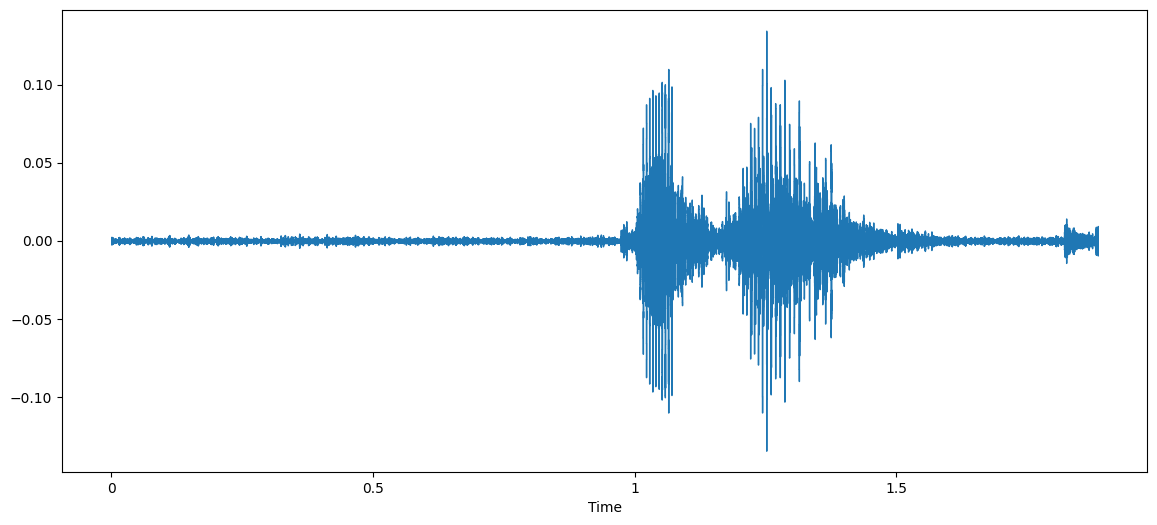

In [ ]:
librosa.display.waveshow(y1,sr=sr, x_axis='time')

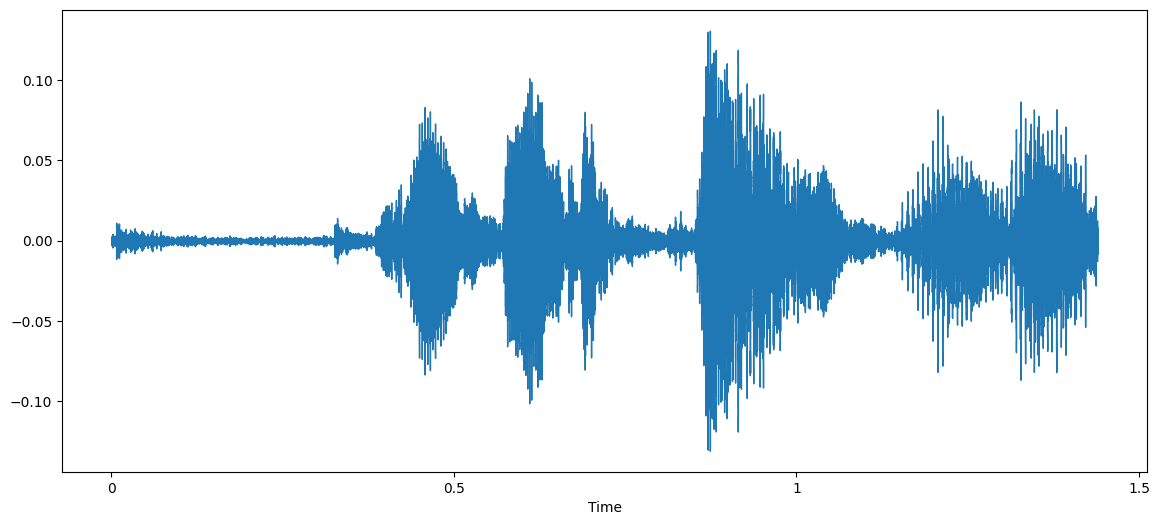

In [ ]:
librosa.display.waveshow(y2,sr=sr, x_axis='time');

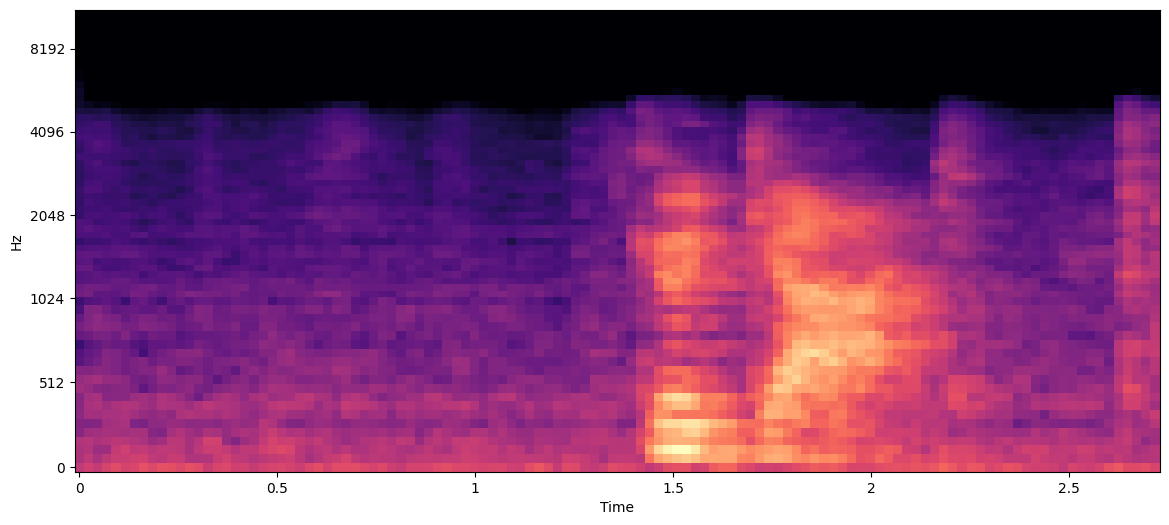

In [ ]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel');

In [ ]:
D1.shape

(64, 118)

In [ ]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='lowpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:

yf1 = f_high(y1, sr)
yf2 = f_high(y2, sr)

In [ ]:
yf1.shape

(60320,)

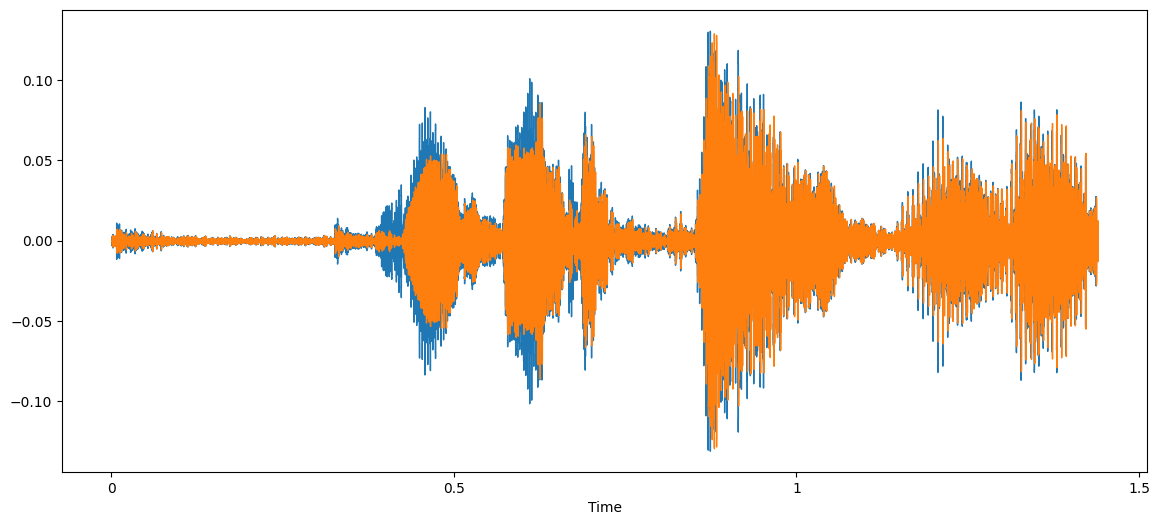

In [ ]:
librosa.display.waveshow(y2,sr=sr, x_axis='time')
librosa.display.waveshow(yf2,sr=sr, x_axis='time')

In [ ]:
display(Audio(y1,rate=sr))
display(Audio(yf1,rate=sr))

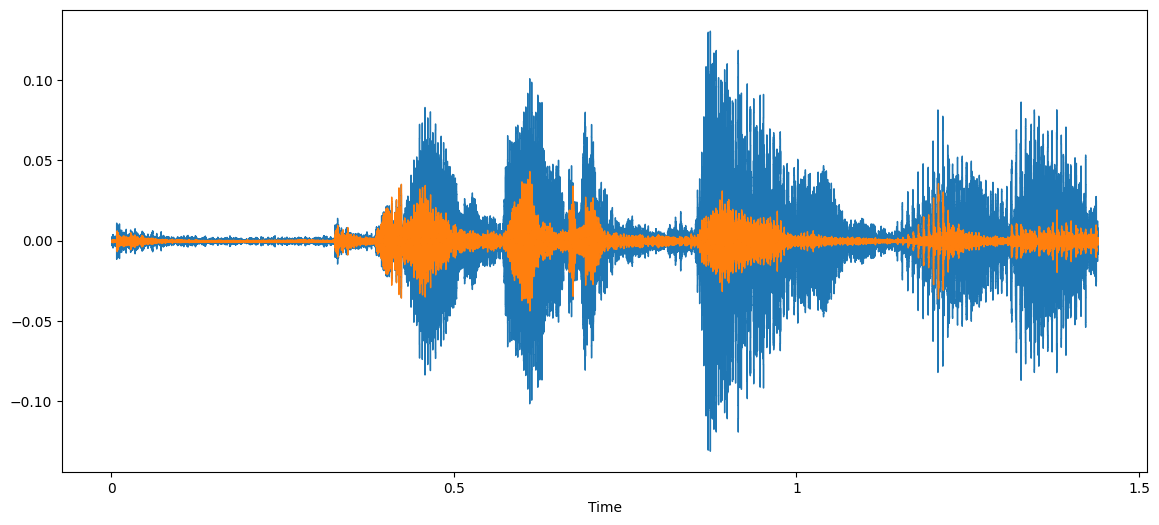

In [ ]:
librosa.display.waveshow(y2,sr=sr, x_axis='time')
librosa.display.waveshow(yf2,sr=sr, x_axis='time')

In [ ]:
import pickle
import IPython.display as ipd
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import signal
import noisereduce as nr
#Reports
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import pickle

In [ ]:
!pip install noisereduce

In [ ]:
audio_path = Path('/media/sasanka/Expansion/xeno-canto-bird-recordings-extended-a-m/A-M')

In [ ]:
e_file = df['Audio_Uttrance_Path'][6]
ipd.display(ipd.Audio(e_file))
y, sr = librosa.load(e_file)
reduced_noise = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2,stationary=False)

In [ ]:
ipd.Audio(data=reduced_noise, rate=sr)

In [ ]:

from scipy import signal
def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
ipd.Audio(data=f_high(reduced_noise, sr), rate=sr)

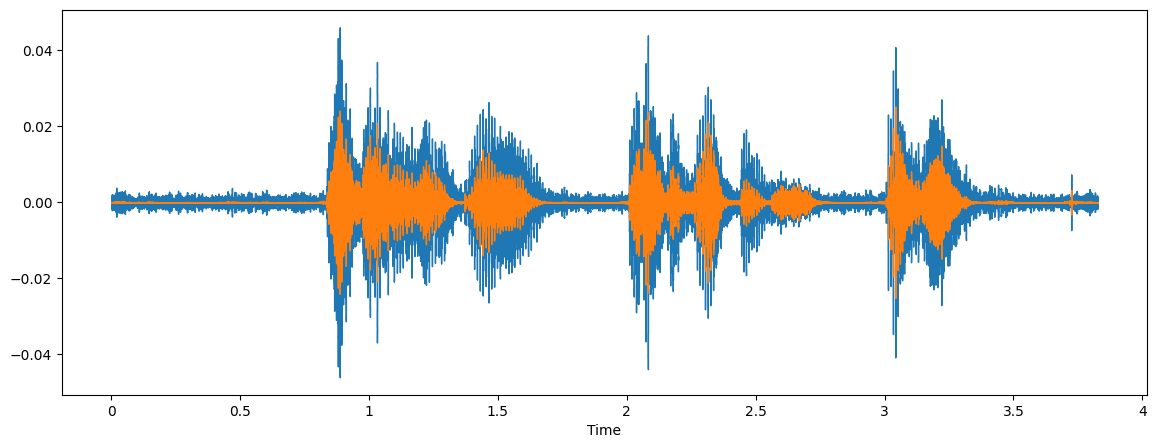

In [ ]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
librosa.display.waveshow(reduced_noise, sr=sr)


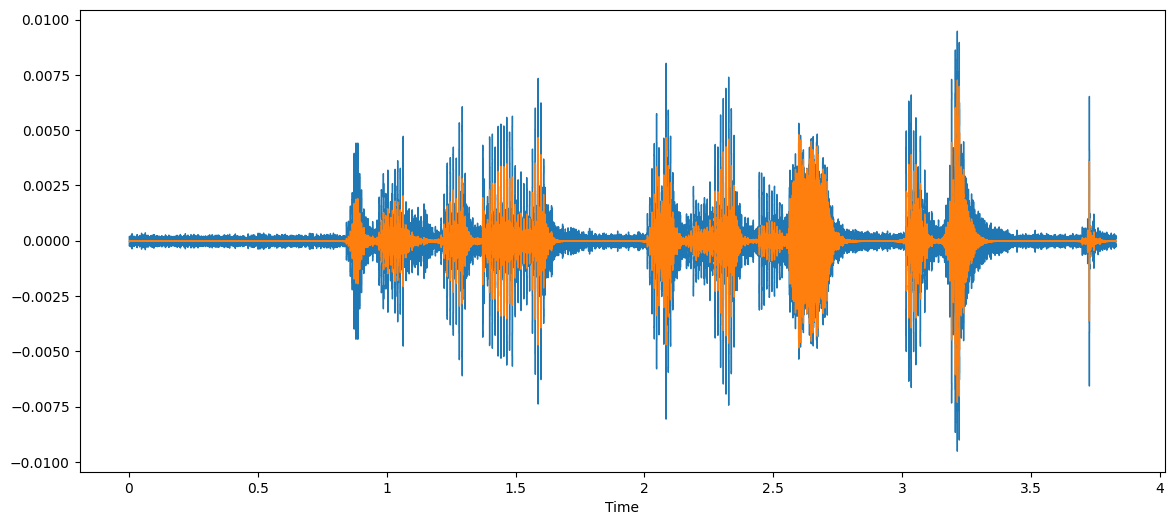

In [ ]:
librosa.display.waveshow(f_high(y, sr), sr=sr)

librosa.display.waveshow(f_high(reduced_noise, sr), sr=sr)

In [ ]:
df_sample = df.head(6000).copy()

In [ ]:
df.Audio_Path

0       /content/drive/My Drive/CS 297/IEMOCAP/Session...
1       /content/drive/My Drive/CS 297/IEMOCAP/Session...
2       /content/drive/My Drive/CS 297/IEMOCAP/Session...
3       /content/drive/My Drive/CS 297/IEMOCAP/Session...
4       /content/drive/My Drive/CS 297/IEMOCAP/Session...
                              ...                        
9922    /content/drive/My Drive/CS 297/IEMOCAP/Session...
9923    /content/drive/My Drive/CS 297/IEMOCAP/Session...
9924    /content/drive/My Drive/CS 297/IEMOCAP/Session...
9925    /content/drive/My Drive/CS 297/IEMOCAP/Session...
9926    /content/drive/My Drive/CS 297/IEMOCAP/Session...
Name: Audio_Path, Length: 9927, dtype: object

In [ ]:
header = 'speaker_id labels chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' de_chroma_stft de_rmse de_spectral_centroid de_spectral_bandwidth de_rolloff de_zero_crossing_rate'
for i in range(1, 21):
    header += f' de_mfcc{i}'
header = header.split()

In [ ]:
header

In [ ]:
file = open('extracted_data.csv', 'w', newline='')
writer = csv.writer(file)
writer.writerow(header)
file.close()

In [ ]:
def reduce_noise(y, sr):
    reduced_noise = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2,stationary=False)
    return f_high(reduced_noise, sr)

In [ ]:
def feature_extractor(sound_path, Speaker_id, dimension):
    y, y_sr = librosa.load(sound_path, mono=True)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=y_sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{Speaker_id} {dimension} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    # y_denoise = reduce_noise(y, y_sr)
    # chroma_stft = librosa.feature.chroma_stft(y=y_denoise, sr=y_sr)
    # rmse = librosa.feature.rms(y=y_denoise)
    # spec_cent = librosa.feature.spectral_centroid(y=y_denoise, sr=sr)
    # spec_bw = librosa.feature.spectral_bandwidth(y=y_denoise, sr=sr)
    # rolloff = librosa.feature.spectral_rolloff(y=y_denoise, sr=sr)
    # zcr = librosa.feature.zero_crossing_rate(y_denoise)
    # mfcc = librosa.feature.mfcc(y=y_denoise, sr=sr)
    # to_append += f' {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    # for e in mfcc:
    #     to_append += f' {np.mean(e)}'
    print(to_append)
    # file = open('extracted_data.csv', 'a', newline='')
    # writer = csv.writer(file)
    # writer.writerow(to_append.split())
    # file.close()

In [ ]:
feature_extractor(df['Audio_Uttrance_Path'][1], df['Speaker_id'][1], df['Major'][1])

Ses04F_script03_1_F000 Fear 0.38528627157211304 0.016675129532814026 1141.5482018295056 1025.156312277263 2258.6805555555557 0.07809399801587301 -395.1395568847656 152.93511962890625 -52.95124053955078 52.3073616027832 -4.552580833435059 2.4721758365631104 -7.403996467590332 -10.915346145629883 1.0640809535980225 -12.749119758605957 6.097909927368164 -5.294469356536865 -0.14195051789283752 0.0317402258515358 -3.9251677989959717 -0.47387149930000305 -6.8631391525268555 -1.2435400485992432 -5.470965385437012 -3.5800118446350098


In [ ]:
for index, row in df_sample.iterrows():
        try:
            sound_path = row['Audio_Uttrance_Path']
            feature_extractor(sound_path, row['Speaker_id'], row['dimension'])
        except Exception as e:
            print(e)
            pass

In [ ]:
df_sample.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.0,3.0,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,3.5,2.0,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,3.0,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,4.0,2.5,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,3.0,2.5,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"


In [ ]:
for index, row in df_sample.iterrows():
    # Load the audio file
    data, sample_rate = load_audio_file(row['Audio_Path'])

    # Extract features
    mfccs = extract_mfccs(data, sample_rate)
    pitches, magnitudes = extract_pitch_and_tone(data, sample_rate)
    spectral_centroids, spectral_contrast = extract_spectral_features(data, sample_rate)

    # Aggregate the features to create a fixed-size vector per file
    mfccs_mean = np.mean(mfccs, axis=1)
    pitches_mean = np.mean(pitches, axis=1)
    spectral_centroids_mean = np.mean(spectral_centroids, axis=1)

    # Combine features
    combined_features = np.hstack((mfccs_mean, pitches_mean, spectral_centroids_mean))

    features_df = features_df.append({'Features': combined_features,
                                       'Arousal': row['Arousal'],
                                       'Valence': row['Valence']}, ignore_index=True)


# Regression

In [ ]:
feature_df = pd.read_csv("extracted_data.csv")

In [ ]:
feature_df

,speaker_id,Arousal,Valence,Dominance,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,de_mfcc11,de_mfcc12,de_mfcc13,de_mfcc14,de_mfcc15,de_mfcc16,de_mfcc17,de_mfcc18,de_mfcc19,de_mfcc20
0,Ses04F_script03_1_M000,"3.0,","3.0,",4.0}],0.565041,0.005598,1471.566022,1513.935755,3228.667469,0.072861,...,5.929020,-6.095982,5.145370,-3.332725,0.071066,1.777053,-1.355841,2.191956,-2.556167,1.071490
1,Ses04F_script03_1_F000,"3.5,","2.0,",3.5}],0.385286,0.016675,1573.196116,1412.793543,3112.744141,0.078094,...,6.634792,-7.161760,7.423044,-5.643597,0.536653,1.333643,2.510599,-2.397790,-2.841666,4.695257
2,Ses04F_script03_1_M001,"3.0,","3.0,",3.5}],0.374339,0.025226,1234.127833,1156.897863,2414.829102,0.061404,...,10.181928,-8.643498,7.153449,-2.161120,-4.776572,5.748007,-1.287103,-1.785346,-0.417296,3.040762
3,Ses04F_script03_1_F001,"4.0,","2.5,",3.5}],0.334066,0.023737,1482.398746,1310.513582,2793.933105,0.077581,...,-1.586304,-2.600833,2.297682,-2.048589,6.394309,-7.049468,-0.560569,4.503947,-2.222177,1.620139
4,Ses04F_script03_1_M002,"3.0,","2.5,",3.5}],0.472655,0.009662,1591.335769,1477.237543,3188.921395,0.088006,...,6.962475,-8.358667,10.805281,-5.720476,-1.575059,0.589069,0.984013,2.800918,-6.122924,5.833481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Ses03M_script01_1_M039,"1.5,","1.5,",3.5}],0.495609,0.002115,1323.909592,1419.772012,2639.447386,0.071871,...,-1.881074,-4.829774,3.449914,-0.571139,3.310512,-3.941232,-0.946059,3.205112,-1.559584,0.687421
5996,Ses03M_script01_1_F038,"4.5,","1.5,",4.0}],0.359146,0.007355,1695.716223,1583.795031,3484.515293,0.090573,...,-1.422622,-1.739579,4.422174,-3.301723,3.325606,-2.978907,0.212659,2.335955,-3.403975,2.932488
5997,Ses03M_script01_1_M040,"2.5,","2.5,",4.0}],0.418537,0.008913,1762.563543,1619.053698,3647.311472,0.099885,...,5.506535,-4.808264,4.111525,-6.863357,9.256686,-3.356643,-6.397611,8.202621,-2.474995,-1.273969
5998,Ses03M_script01_1_F039,"4.0,","2.0,",3.0}],0.446742,0.004325,1623.493198,1510.135985,3197.680664,0.097892,...,2.279888,-7.311930,10.137652,-7.661117,1.551399,1.200826,0.119032,0.577348,-4.513241,5.371584


In [ ]:
X = feature_df.iloc[:, 3:]

In [ ]:
Y= feature_df.iloc[:, 1:2]

In [ ]:
feature_df['labels'][:]


KeyError: 'labels'

In [ ]:
df = pd.read_csv("features_iemocap.csv")

In [ ]:
df

,speaker_id,Arousal,Valence,Dominance,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,de_mfcc11,de_mfcc12,de_mfcc13,de_mfcc14,de_mfcc15,de_mfcc16,de_mfcc17,de_mfcc18,de_mfcc19,de_mfcc20
0,Ses04F_script03_1_M000,"3.0,","3.0,",4.0}],0.565041,0.005598,1471.566022,1513.935755,3228.667469,0.072861,...,5.929020,-6.095982,5.145370,-3.332725,0.071066,1.777053,-1.355841,2.191956,-2.556167,1.071490
1,Ses04F_script03_1_F000,"3.5,","2.0,",3.5}],0.385286,0.016675,1573.196116,1412.793543,3112.744141,0.078094,...,6.634792,-7.161760,7.423044,-5.643597,0.536653,1.333643,2.510599,-2.397790,-2.841666,4.695257
2,Ses04F_script03_1_M001,"3.0,","3.0,",3.5}],0.374339,0.025226,1234.127833,1156.897863,2414.829102,0.061404,...,10.181928,-8.643498,7.153449,-2.161120,-4.776572,5.748007,-1.287103,-1.785346,-0.417296,3.040762
3,Ses04F_script03_1_F001,"4.0,","2.5,",3.5}],0.334066,0.023737,1482.398746,1310.513582,2793.933105,0.077581,...,-1.586304,-2.600833,2.297682,-2.048589,6.394309,-7.049468,-0.560569,4.503947,-2.222177,1.620139
4,Ses04F_script03_1_M002,"3.0,","2.5,",3.5}],0.472655,0.009662,1591.335769,1477.237543,3188.921395,0.088006,...,6.962475,-8.358667,10.805281,-5.720476,-1.575059,0.589069,0.984013,2.800918,-6.122924,5.833481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Ses03M_script01_1_M039,"1.5,","1.5,",3.5}],0.495609,0.002115,1323.909592,1419.772012,2639.447386,0.071871,...,-1.881074,-4.829774,3.449914,-0.571139,3.310512,-3.941232,-0.946059,3.205112,-1.559584,0.687421
5996,Ses03M_script01_1_F038,"4.5,","1.5,",4.0}],0.359146,0.007355,1695.716223,1583.795031,3484.515293,0.090573,...,-1.422622,-1.739579,4.422174,-3.301723,3.325606,-2.978907,0.212659,2.335955,-3.403975,2.932488
5997,Ses03M_script01_1_M040,"2.5,","2.5,",4.0}],0.418537,0.008913,1762.563543,1619.053698,3647.311472,0.099885,...,5.506535,-4.808264,4.111525,-6.863357,9.256686,-3.356643,-6.397611,8.202621,-2.474995,-1.273969
5998,Ses03M_script01_1_F039,"4.0,","2.0,",3.0}],0.446742,0.004325,1623.493198,1510.135985,3197.680664,0.097892,...,2.279888,-7.311930,10.137652,-7.661117,1.551399,1.200826,0.119032,0.577348,-4.513241,5.371584


In [ ]:
def convert_to_float(value):
    if isinstance(value, str):
        # Remove special characters
        value = re.sub(r'[,\]}]', '', value)
        # Convert to float
        return float(value)
    else:
        return value

# Apply the function to the specified columns
columns_to_convert = ['Valence', 'Arousal', 'Dominance']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_float)

In [ ]:
df.head()

,speaker_id,Arousal,Valence,Dominance,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,de_mfcc11,de_mfcc12,de_mfcc13,de_mfcc14,de_mfcc15,de_mfcc16,de_mfcc17,de_mfcc18,de_mfcc19,de_mfcc20
0,Ses04F_script03_1_M000,3.0,3.0,4.0,0.565041,0.005598,1471.566022,1513.935755,3228.667469,0.072861,...,5.929020,-6.095982,5.145370,-3.332725,0.071066,1.777053,-1.355841,2.191956,-2.556167,1.071490
1,Ses04F_script03_1_F000,3.5,2.0,3.5,0.385286,0.016675,1573.196116,1412.793543,3112.744141,0.078094,...,6.634792,-7.161760,7.423044,-5.643597,0.536653,1.333643,2.510599,-2.397790,-2.841666,4.695257
2,Ses04F_script03_1_M001,3.0,3.0,3.5,0.374339,0.025226,1234.127833,1156.897863,2414.829102,0.061404,...,10.181928,-8.643498,7.153449,-2.161120,-4.776572,5.748007,-1.287103,-1.785346,-0.417296,3.040762
3,Ses04F_script03_1_F001,4.0,2.5,3.5,0.334066,0.023737,1482.398746,1310.513582,2793.933105,0.077581,...,-1.586304,-2.600833,2.297682,-2.048589,6.394309,-7.049468,-0.560569,4.503947,-2.222177,1.620139
4,Ses04F_script03_1_M002,3.0,2.5,3.5,0.472655,0.009662,1591.335769,1477.237543,3188.921395,0.088006,...,6.962475,-8.358667,10.805281,-5.720476,-1.575059,0.589069,0.984013,2.800918,-6.122924,5.833481


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y = df[['Arousal']]

X = df.drop(['speaker_id', 'Arousal', 'Valence', 'Dominance'], axis=1)
X = X.iloc[:, :26]


# Standard Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Test-Train Split without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define and Train a RandomForestRegressor model



In [ ]:
model = RandomForestRegressor(n_estimators=40, max_depth = 10 )

In [ ]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.565041,0.005598,1471.566022,1513.935755,3228.667469,0.072861,-494.027924,139.052765,-31.025635,35.750225,...,9.204130,0.856306,4.741369,1.861046,0.069017,3.484501,-0.647133,2.850968,-3.409374,-1.027517
1,0.385286,0.016675,1573.196116,1412.793543,3112.744141,0.078094,-395.391052,147.840012,-52.811768,52.265549,...,6.779453,-9.531568,0.651363,-5.685840,-5.867458,-3.288599,-5.461630,0.535396,-3.146953,2.948692
2,0.374339,0.025226,1234.127833,1156.897863,2414.829102,0.061404,-350.782043,171.983231,-60.930603,29.741547,...,3.087605,-7.757082,-3.416263,-3.425797,-6.082253,-8.721380,-6.763094,-1.183802,-2.069155,1.743253
3,0.334066,0.023737,1482.398746,1310.513582,2793.933105,0.077581,-361.653778,136.530304,-50.223804,37.132084,...,-0.050401,-3.724578,-2.464066,-2.597334,-2.866848,-9.833782,-8.256481,2.091051,1.146387,6.498444
4,0.472655,0.009662,1591.335769,1477.237543,3188.921395,0.088006,-420.006867,145.384293,-45.471882,47.142094,...,9.914029,-9.381135,6.101508,-1.941016,-4.380347,0.531694,-4.795254,2.803825,-0.351730,0.535328


In [ ]:
model.fit(X_train, y_train)

<ipython-input-101-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=40)

In [ ]:

predictions = model.predict(X_test)

In [ ]:
y_test

,Arousal
4800,4.0000
4801,3.5000
4802,4.5000
4803,3.0000
4804,2.6667
...,...
5995,1.5000
5996,4.5000
5997,2.5000
5998,4.0000


In [ ]:
predictions

array([3.5312011 , 2.86006652, 2.75643874, ..., 3.20955806, 3.0082735 ,
       3.08475982])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.36193030271202514
R-squared Score: 0.3560506369571811


N- 20
Mean Squared Error: 0.38738209393941664
R-squared Score: 0.31076660125647804len(X_train)

N-25
Mean Squared Error: 0.3715405038192
R-squared Score: 0.3389520883269421

N-45
Mean Squared Error: 0.3692815911053437
R-squared Score: 0.34297116435444586

4800

In [ ]:
y_test

,Arousal,Valence,Dominance
4800,4.0000,2.0000,3.5000
4801,3.5000,3.0000,3.0000
4802,4.5000,4.5000,1.0000
4803,3.0000,4.0000,2.6667
4804,2.6667,4.3333,2.6667
...,...,...,...
5995,1.5000,1.5000,3.5000
5996,4.5000,1.5000,4.0000
5997,2.5000,2.5000,4.0000
5998,4.0000,2.0000,3.0000


# Re-Extraction

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from transformers import RobertaTokenizer, TFRobertaModel
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import re
from google.colab import drive


Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')
drive_path = "/content/drive/My Drive/CS 297/IEMOCAP"

dataset_path = f"{drive_path}/IEMOCAP_Final.csv"

import pandas as pd
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 2]","[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 1]","[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[3, 1]","[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"


In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Read the metadata CSV file
metadata_df = df
audio_paths = metadata_df['audio_path'].values
categories = metadata_df['category'].apply(eval).values
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Convert categories to one-hot encoding
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(categories)

# Step 3: Create a PyTorch Dataset
class AudioDataset(Dataset):
    def _init_(self, audio_paths, labels, processor):
        self.audio_paths = audio_paths
        self.labels = labels
        self.processor = processor

    def _len_(self):
        return len(self.audio_paths)

    def _getitem_(self, idx):
        audio_path = self.audio_paths[idx]
        label = self.labels[idx]
        # Load and preprocess the audio file
        audio_input = processor(audio_path, return_tensors="pt", sampling_rate=16000).input_values[0]
        return {"input_values": audio_input, "labels": torch.tensor(label, dtype=torch.float)}

# Instantiate the dataset
audio_dataset = AudioDataset(audio_paths, labels, processor)

# Split dataset into training and validation sets (80-20 split)
train_size = int(0.8 * len(audio_dataset))
val_size = len(audio_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(audio_dataset, [train_size, val_size])

model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base-960h",
    num_labels=len(mlb.classes_),
    problem_type="multi_label_classification",
)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_dir='./logs',
    evaluation_strategy="epoch",
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions > 0.5
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='micro')
    recall = recall_score(labels, preds, average='micro')
    f1 = f1_score(labels, preds, average='micro')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

model.save_pretrained("./fine_tuned_model")

In [ ]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5869 sha256=5eb6b0e4cfa55b72fa566c7a26181da2f875aca1ef3262ed1ae03aa0b1611eac
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import librosa
import numpy as np
import python_speech_features as psf

# Function to extract short-term frame-level features (MFCCs)
def extract_frame_features(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs_mean = np.mean(mfccs, axis=1)
    # # LPC features
    # lpc = psf.lpc(y, 12)

    # # PLP features
    # plp = psf.plp(y, sr)

    # # Wavelet Transform features
    # coeffs = pywt.wavedec(y, 'db1', level=5)
    # # Combine all features into a single feature vector
    # features = np.concatenate((mfccs_mean, lpc, plp.mean(axis=1), np.concatenate(coeffs)))

    return mfccs_mean

# Function to extract long-term clip-level features (e.g., mean and standard deviation of MFCCs)
def extract_clip_features(frame_features):
    mean_features = np.mean(frame_features, axis=0)
    std_features = np.std(frame_features, axis=0)
    return np.concatenate((mean_features, std_features))

# Assuming 'df' is your initial DataFrame with columns 'audio_path', 'speaker_id', and 'labels'
# features_df = pd.DataFrame()

# for index, row in df.iterrows():
#     audio_path = row['audio_path']
#     speaker_id = row['speaker_id']
#     labels = row['labels']

#     # Extract short-term frame-level features
#     frame_features = extract_frame_features(audio_path)

#     # Extract long-term clip-level features
#     clip_features = extract_clip_features(frame_features)

#     # Create a new row with extracted features, speaker ID, and labels
#     new_row = {'speaker_id': speaker_id, 'labels': labels}

#     for i, feature in enumerate(clip_features):
#         new_row[f'feature_{i+1}'] = feature

#     features_df = features_df.append(new_row, ignore_index=True)

# features_df.to_csv('extracted_features.csv', index=False)

In [ ]:
df['Audio_Uttrance_Path'][1]

'/content/drive/My Drive/CS 297/IEMOCAP/Session4/Audio_Uttrances/Ses04F_script03_1/Ses04F_script03_1_F000.wav'

In [ ]:
frame_features = extract_frame_features(df['Audio_Uttrance_Path'][1])

In [ ]:
frame_features

array([-395.39105   ,  147.84001   ,  -52.811768  ,   52.26555   ,
        -17.315016  ,   -3.5186415 ,  -11.33244   ,   -6.0504293 ,
          1.6071647 ,   -7.472517  ,    6.779453  ,   -9.531568  ,
          0.6513632 ,   -5.68584   ,   -5.8674583 ,   -3.2885985 ,
         -5.46163   ,    0.53539556,   -3.146953  ,    2.9486916 ],
      dtype=float32)